In [2]:
from signals import *
from plots import *
from solvers import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# from pylab import rcParams
# rcParams['figure.figsize'] = 20, 20
%matplotlib inline

## Results for photoshoped images

In [3]:
def todegree(x):
    return x*180/np.pi

def fromdegree(x):
    return x*np.pi/180

def get_image(name, min_, max_, cut=0):
    img = mpimg.imread(name)
    img = (0.2126*img[:,:,0]) + (0.7152*img[:,:,1]) + (0.0722*img[:,:,2])
    img= img[min_:max_]
    img = np.mean(img,0)
    if cut > 0:
        img = img[cut:-cut]
#     img = img - np.min(img)
#     return img/np.max(img)
    return img

In [4]:
img = mpimg.imread('surface-images/cheeting/pattern5.png')
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'surface-images/cheeting/pattern5.png'

In [159]:
import os
print(os.listdir("surface-images/cheeting"))
img1 = get_image('surface-images/cheeting/pattern3.png', 150, 250, cut=45)
img1 = img1[:-30]
img2 = get_image('surface-images/cheeting/pattern4.png', 150, 250, cut=10)
img2 = img2[:-30]
img3 = get_image('surface-images/cheeting/pattern5.png', 180, 220, cut=10)
img2 = img2[:-60]
# img3 = img3[40:-30]
# img4 = get_image('surface-images/cheeting/pattern3.png', 150, 250, cut=10)

['pattern.png', 'pattern1.png', 'pattern2.png', 'pattern3.png', 'pattern4.png', 'pattern5.png']


In [160]:
coef = [0.5, -0.1,-0.3, 0.65]
pol = SecondSurfacePolynomial(coef)
ends = 1.2
t = np.linspace(-ends, ends, 100)
row = pol.get_samples(t).reshape(100,1)

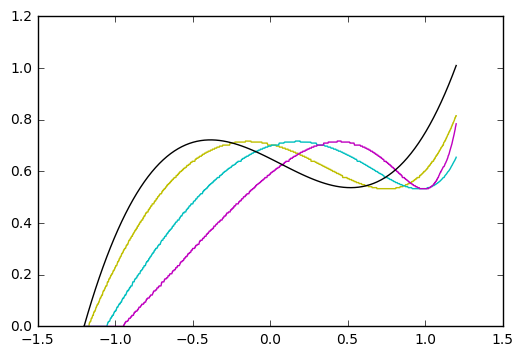

In [161]:
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import decimate

plt.plot(np.linspace(-ends,ends,len(img1)), img1, label='filtered', color='y')
plt.plot(np.linspace(-ends,ends,len(img2)), img2, label='filtered', color='c')
plt.plot(np.linspace(-ends,ends,len(img3)), img3, label='filtered', color='m')
# plt.plot(np.linspace(-ends,ends,len(img4)), img4, label='filtered')

plt.plot(t, row, label='orginal',color='k')

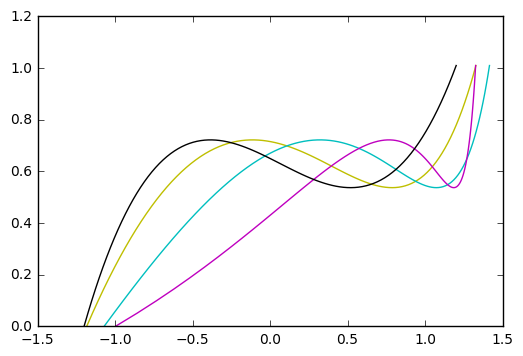

In [195]:
plt.plot(np.array(pol.shifted_positions(sample_positions=t,trace_param=[-0.15,1,1]))+0.3, row, color='y')
plt.plot(np.array(pol.shifted_positions(sample_positions=t,trace_param=[-0.34,0.8,1]))+0.7, row, color='c')
plt.plot(np.array(pol.shifted_positions(sample_positions=t,trace_param=[-0.54,0.4,1]))+1, row, color='m')
plt.plot(t, row, label='orginal',color='k')

force stop after 1000 steps
angle: 0.539649549196 (30.9196415851 deg )
[ 0.16647737 -0.65706975  0.61557115  0.73841313]


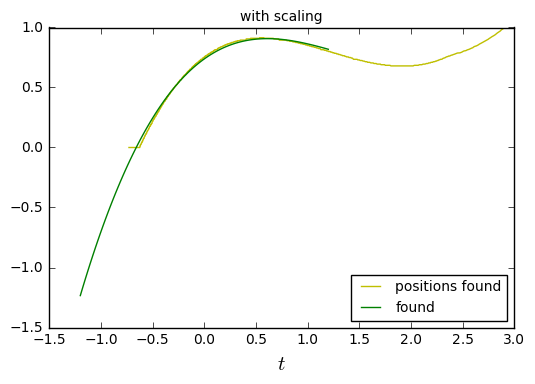

In [133]:
# pf = pf[int(len(pf)/2):]

solver = ConstrainedALS(
    img3,
    4,
    SecondSurfacePolynomial,
    start_pos=np.linspace(-1,1,len(img3)),
    stopping_error=1e-10,
    beta=1,
    show_plots=False,
    max_iter=1000,
    angle=fromdegree(10)
    )
    
solver.solve()

# # print solver.train_error

# # print polynomial.square_error(SignalPolynomial(solver.parameter_estimate))
# pylab.ioff()
# # plot_results(SignalPolynomial(solver.parameter_estimate),'r',lw = 3)
pylab.plot(solver.get_position_estimates(),solver.get_samples(),'y',label="positions found")

print("angle:", solver.tr_param[0], "(" + str(todegree(solver.tr_param[0])) + " deg )" )
print(solver.parameter_estimate)
polynomial = FullSurfacePolynomial(solver.parameter_estimate)
pylab.plot(t,polynomial.get_samples(t), color='g',label="found")
# pylab.plot(t,row,label="true")
pylab.title("with scaling", fontsize=10)
pylab.xlabel(r'$t$',fontsize=15)
pylab.legend(loc="lower right", fontsize=10)
pylab.gcf().subplots_adjust(bottom=0.15)
pylab.show()